In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
acs = pd.read_csv('ACS16_NYC.csv')

In [124]:
acs.shape

(1838, 8)

In [125]:
acs.head()

,Unnamed: 0,census_tract,total_population,median_age,total_population_25yrsandover,total_bachelors_degree,median_income,percent_bachelorsdegree
0,1,Bronx_1,7503.0,32.1,303.0,0.7,10778.0,0.231023
1,2,Bronx_2,5251.0,38.6,449.0,11.8,30760.0,2.628062
2,3,Bronx_4,5980.0,39.4,300.0,14.3,32371.0,4.766667
3,4,Bronx_16,6056.0,36.9,325.0,5.8,17848.0,1.784615
4,5,Bronx_19,2682.0,32.5,227.0,13.7,21788.0,6.035242


In [126]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [127]:
X = acs[['median_age', 'median_income', 'percent_bachelorsdegree']]

## Standard Scale

In [128]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

## Cluster Analysis (K-Means)

### Find value of K

At 2 clusters, inertia is 3557.7964723213295
At 3 clusters, inertia is 2719.940923130962
At 4 clusters, inertia is 2370.7890060698937
At 5 clusters, inertia is 2042.1683701968434
At 6 clusters, inertia is 1799.3662039621804
At 7 clusters, inertia is 1630.7103397946632
At 8 clusters, inertia is 1476.4942331303496
At 9 clusters, inertia is 1362.5149576825333


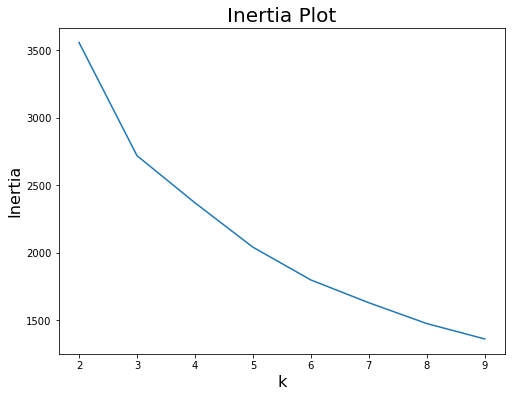

In [129]:
np.random.seed(42)
s = np.zeros(8)
for k in range(0, 8):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(X_std)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Inertia Plot', fontsize = 20)

## K=3 is optimal
K=3 is at the elbow of the score graph

In [130]:
cluster = KMeans(n_clusters = 3, n_init=100)
cluster.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [131]:
acs['clusterLabels'] = cluster.labels_

In [132]:
acs.clusterLabels.value_counts()

1    859
0    734
2    245
Name: clusterLabels, dtype: int64

## Investigate clusters' statistics

In [134]:
for i in range(0,3):
    group = acs[acs['clusterLabels'] == i]
    print('Group ' + str(i) + ':')
    print('    Group Size: ' + str(len(group)))
    print('    Population: ' + str(round(group.total_population.mean(),2)))
    print('    Median Age: ' + str(round(group.median_age.mean(),2)))
    print('    Median Income: ' + str(round(group.median_income.mean(),2)))
    print('    Percent with Bachelors Degree: ' + str(round(group.percent_bachelorsdegree.mean(),2)))

Group 0:
    Group Size: 734
    Population: 3597.58
    Median Age: 41.73
    Median Income: 31530.2
    Percent with Bachelors Degree: 8.83
Group 1:
    Group Size: 859
    Population: 4130.64
    Median Age: 32.02
    Median Income: 21809.76
    Percent with Bachelors Degree: 5.6
Group 2:
    Group Size: 245
    Population: 2604.19
    Median Age: 37.77
    Median Income: 48369.13
    Percent with Bachelors Degree: 20.73


Percent with Bachelors Degree seems to be incredibly low and Median Income seems low as well

## Comments on Groups:


### Group 0:
- Oldest but in the middle for all else
### Group 1:
- Poorest and youngest group
### Group 2:
- Highest education level and income, lower population

## 

In [135]:
acs.head()

,Unnamed: 0,census_tract,total_population,median_age,total_population_25yrsandover,total_bachelors_degree,median_income,percent_bachelorsdegree,clusterLabels
0,1,Bronx_1,7503.0,32.1,303.0,0.7,10778.0,0.231023,1
1,2,Bronx_2,5251.0,38.6,449.0,11.8,30760.0,2.628062,0
2,3,Bronx_4,5980.0,39.4,300.0,14.3,32371.0,4.766667,0
3,4,Bronx_16,6056.0,36.9,325.0,5.8,17848.0,1.784615,1
4,5,Bronx_19,2682.0,32.5,227.0,13.7,21788.0,6.035242,1
